In [2]:
from src.train import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
#from keras import Input
#from tensorflow.keras.preprocessing import image
#from sklearn import preprocessing

Using TensorFlow backend.


Lo primero, he creado un dataset con diferentes fondos y condiciones de iluminación para que pudiera reconocerlo la webcam grabando videos y creado imagenes. Las funciones utilizadas están en data.py


In [3]:
#Paths
trainPath='INPUT/rpst/'

### Data Generators

In [273]:
batch_size = 64

In [274]:
generator = ImageDataGenerator(rescale=1./255,
      rotation_range=15,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      zoom_range=0.1,
      fill_mode='nearest',
      validation_split = 0.15) 


trainGen= generator.flow_from_directory(trainPath,target_size=(106, 68),batch_size=batch_size,class_mode='categorical') 

validationGen = generator.flow_from_directory(trainPath,target_size=(106, 68),batch_size=batch_size,class_mode='categorical',shuffle=False, subset = 'validation')



Found 11390 images belonging to 3 classes.
Found 1706 images belonging to 3 classes.


In [275]:
trainGen.labels

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [282]:
steps_per_epoch = trainGen.samples // trainGen.batch_size
validsteps = validationGen.samples// validationGen.batch_size
print(steps_per_epoch,validsteps)

177 26


In [285]:
sample_training_images, labels = next(trainGen)

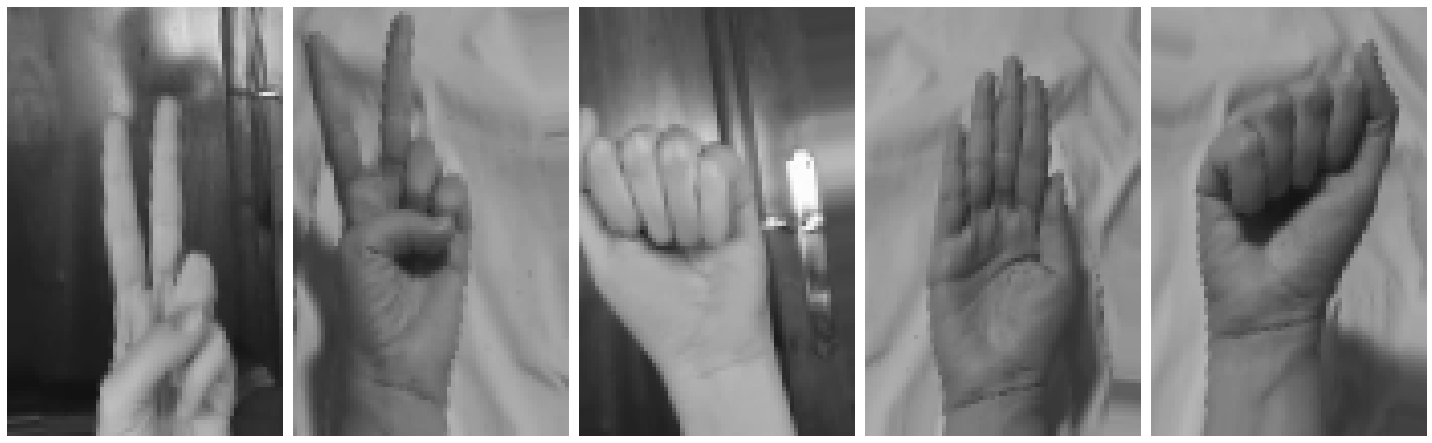

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [286]:
plotImages(sample_training_images[:5])
print(labels[:5])

# TRAIN

He entrenado varios modelos, primero creados y ajustados por mi y luego escogiendo modelos entrenados para probar la eficiencia de cada modelo.

In [287]:
model = model()
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 102, 64, 64)       4864      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 51, 32, 64)        0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 51, 32, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 47, 28, 64)        102464    
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 24, 14, 64)        0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 24, 14, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 20, 10, 128)      

classReport(model,validationGen,validsteps)

In [22]:
optimizer="adam"

In [23]:
history=fit(model,trainGen,validationGen,optimizer,steps_per_epoch,15,validsteps)

Epoch 1/15
177/177 [==============================] - 129s 729ms/step - loss: 0.8905 - accuracy: 0.5462 - val_loss: 0.4861 - val_accuracy: 0.8119
Epoch 2/15
177/177 [==============================] - 132s 745ms/step - loss: 0.2744 - accuracy: 0.8970 - val_loss: 0.1251 - val_accuracy: 0.9525
Epoch 3/15
177/177 [==============================] - 126s 713ms/step - loss: 0.1001 - accuracy: 0.9664 - val_loss: 0.0530 - val_accuracy: 0.9820
Epoch 4/15
177/177 [==============================] - 128s 723ms/step - loss: 0.0538 - accuracy: 0.9820 - val_loss: 0.0270 - val_accuracy: 0.9916
Epoch 5/15
177/177 [==============================] - 130s 736ms/step - loss: 0.0646 - accuracy: 0.9788 - val_loss: 0.0373 - val_accuracy: 0.9844
Epoch 6/15
177/177 [==============================] - 134s 755ms/step - loss: 0.0370 - accuracy: 0.9885 - val_loss: 0.0177 - val_accuracy: 0.9952
Epoch 7/15
177/177 [==============================] - 143s 807ms/step - loss: 0.0242 - accuracy: 0.9913 - val_loss: 0.0067 -

In [24]:
model.save("modelAdam.h5")

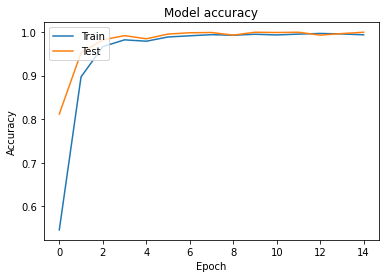

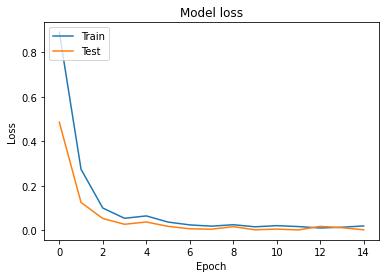

In [25]:
plot(history)

Classification Report
              precision    recall  f1-score   support

       paper       1.00      1.00      1.00       594
        rock       1.00      0.99      1.00       552
    scissors       0.99      1.00      1.00       560

    accuracy                           1.00      1706
   macro avg       1.00      1.00      1.00      1706
weighted avg       1.00      1.00      1.00      1706

Confusion Matrix
[[1.         0.         0.        ]
 [0.00181159 0.99275362 0.00543478]
 [0.         0.00178571 0.99821429]]


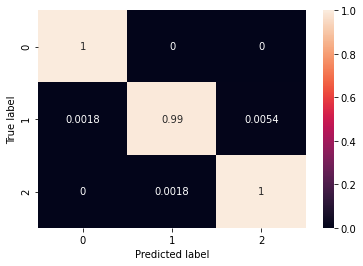

In [26]:
classReport(model,validationGen,validsteps)

### Usando modelos pre-entrenados

# DENSENET121

In [305]:
modeldense= modelDenseNet121()
modeldense.summary()

Model: "functional_25"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_22 (InputLayer)           [(None, 106, 68, 3)] 0                                            
__________________________________________________________________________________________________
zero_padding2d_10 (ZeroPadding2 (None, 112, 74, 3)   0           input_22[0][0]                   
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 53, 34, 64)   9408        zero_padding2d_10[0][0]          
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 53, 34, 64)   256         conv1/conv[0][0]                 
______________________________________________________________________________________

In [306]:
optimizer=Adam(learning_rate=0.0001)
history=fit(modeldense,trainGen,validationGen,optimizer,steps_per_epoch,15,validsteps)

Epoch 1/15
177/177 [==============================] - 372s 2s/step - loss: 0.1732 - accuracy: 0.9432 - val_loss: 0.0859 - val_accuracy: 0.9688
Epoch 2/15
177/177 [==============================] - 372s 2s/step - loss: 0.0059 - accuracy: 0.9981 - val_loss: 0.0287 - val_accuracy: 0.9934
Epoch 3/15
177/177 [==============================] - 372s 2s/step - loss: 0.0029 - accuracy: 0.9993 - val_loss: 0.0043 - val_accuracy: 0.9994
Epoch 4/15
177/177 [==============================] - 372s 2s/step - loss: 0.0023 - accuracy: 0.9994 - val_loss: 1.1447e-04 - val_accuracy: 1.0000
Epoch 5/15
177/177 [==============================] - 372s 2s/step - loss: 0.0013 - accuracy: 0.9995 - val_loss: 5.7621e-05 - val_accuracy: 1.0000
Epoch 6/15
177/177 [==============================] - 372s 2s/step - loss: 0.0017 - accuracy: 0.9992 - val_loss: 5.0967e-05 - val_accuracy: 1.0000
Epoch 7/15
177/177 [==============================] - 372s 2s/step - loss: 5.3495e-04 - accuracy: 0.9999 - val_loss: 9.5729e-06 - 

In [307]:
modeldense.save("modelDense.h5")

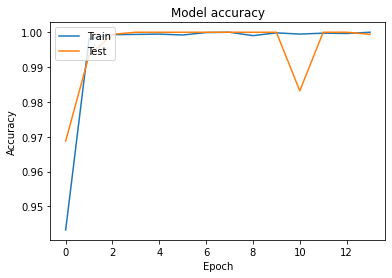

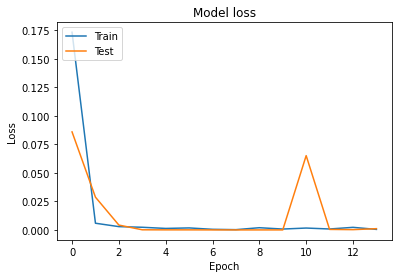

In [308]:
plot(history)

Classification Report
              precision    recall  f1-score   support

       paper       1.00      1.00      1.00       594
        rock       1.00      1.00      1.00       552
    scissors       1.00      1.00      1.00       560

    accuracy                           1.00      1706
   macro avg       1.00      1.00      1.00      1706
weighted avg       1.00      1.00      1.00      1706

Confusion Matrix
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


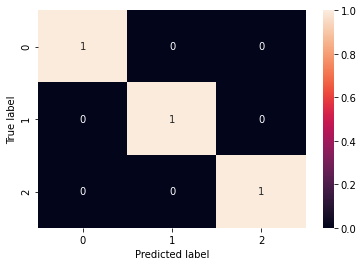

In [309]:
classReport(modeldense,validationGen,validsteps)

# RESNET50

In [310]:
modelRN50= modelResNet50()
modelRN50.summary()

Model: "functional_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_24 (InputLayer)        [(None, 106, 68, 3)]      0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 106, 68, 3)        12        
_________________________________________________________________
resnet101 (Functional)       (None, 4, 3, 2048)        42658176  
_________________________________________________________________
flatten_18 (Flatten)         (None, 24576)             0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 24576)             0         
_________________________________________________________________
dense_26 (Dense)             (None, 3)                 73731     
Total params: 42,731,919
Trainable params: 42,626,569
Non-trainable params: 105,350
___________________________________

In [311]:
optimizer=Adam(learning_rate=0.0001)
history=fit(modelRN50,trainGen,validationGen,optimizer,steps_per_epoch,5,validsteps)
modelRN50.save("modelRN50.h5")

Epoch 1/5
177/177 [==============================] - 922s 5s/step - loss: 0.0906 - accuracy: 0.9708 - val_loss: 3.4350 - val_accuracy: 0.3347
Epoch 2/5
177/177 [==============================] - 813s 5s/step - loss: 0.0045 - accuracy: 0.9988 - val_loss: 1.0099 - val_accuracy: 0.5727
Epoch 3/5
177/177 [==============================] - 814s 5s/step - loss: 0.0061 - accuracy: 0.9985 - val_loss: 0.7161 - val_accuracy: 0.7157
Epoch 4/5
177/177 [==============================] - 813s 5s/step - loss: 0.0047 - accuracy: 0.9986 - val_loss: 0.1350 - val_accuracy: 0.9507
Epoch 5/5
27/27 [==============================] - 21s 783ms/step - loss: 0.0846 - accuracy: 0.9730
Test loss: =  0.08458549529314041
Test accuracy =  0.9730363488197327


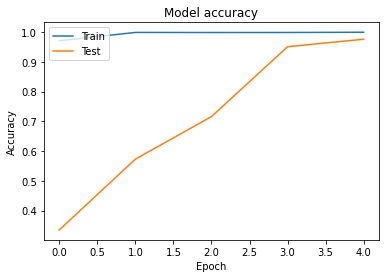

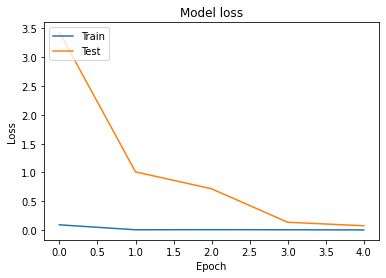

In [312]:
plot(history)

Classification Report
              precision    recall  f1-score   support

       paper       0.98      0.96      0.97       594
        rock       1.00      0.97      0.99       552
    scissors       0.95      1.00      0.97       560

    accuracy                           0.98      1706
   macro avg       0.98      0.98      0.98      1706
weighted avg       0.98      0.98      0.98      1706

Confusion Matrix
[[0.95791246 0.         0.04208754]
 [0.01811594 0.97282609 0.00905797]
 [0.         0.         1.        ]]


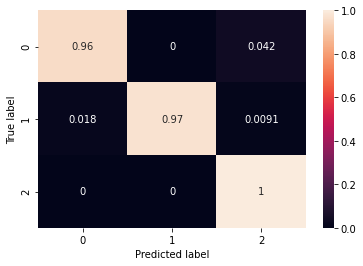

In [313]:
classReport(modelRN50,validationGen,validsteps)

# RESNET101

In [314]:
modelRN101= modelResNet101()
modelRN101.summary()

Model: "functional_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_26 (InputLayer)        [(None, 106, 68, 3)]      0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 106, 68, 3)        12        
_________________________________________________________________
resnet101 (Functional)       (None, 4, 3, 2048)        42658176  
_________________________________________________________________
flatten_19 (Flatten)         (None, 24576)             0         
_________________________________________________________________
dropout_31 (Dropout)         (None, 24576)             0         
_________________________________________________________________
dense_27 (Dense)             (None, 3)                 73731     
Total params: 42,731,919
Trainable params: 42,626,569
Non-trainable params: 105,350
___________________________________

In [315]:
optimizer=Adam(learning_rate=0.0001)
history=fit(modelRN101,trainGen,validationGen,optimizer,steps_per_epoch,4,validsteps)
modelRN101.save("modelRN101.h5")

Epoch 1/4
177/177 [==============================] - 813s 5s/step - loss: 0.0752 - accuracy: 0.9732 - val_loss: 6.4840 - val_accuracy: 0.3365
Epoch 2/4
177/177 [==============================] - 812s 5s/step - loss: 0.0122 - accuracy: 0.9969 - val_loss: 2.1624 - val_accuracy: 0.4892
Epoch 3/4
177/177 [==============================] - 812s 5s/step - loss: 0.0046 - accuracy: 0.9986 - val_loss: 0.3797 - val_accuracy: 0.8666
Epoch 4/4
27/27 [==============================] - 21s 777ms/step - loss: 0.0388 - accuracy: 0.9853
Test loss: =  0.038845568895339966
Test accuracy =  0.9853458404541016


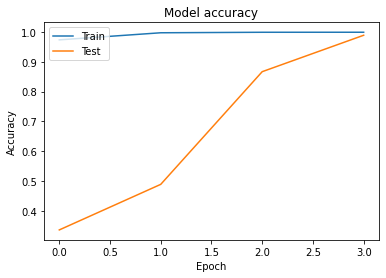

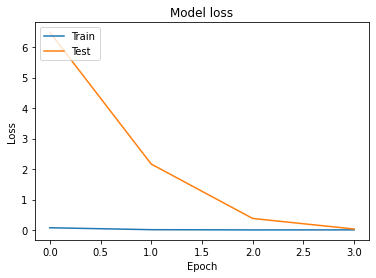

In [316]:
plot(history)

Classification Report
              precision    recall  f1-score   support

       paper       1.00      1.00      1.00       594
        rock       1.00      0.97      0.98       552
    scissors       0.97      1.00      0.98       560

    accuracy                           0.99      1706
   macro avg       0.99      0.99      0.99      1706
weighted avg       0.99      0.99      0.99      1706

Confusion Matrix
[[0.9983165  0.         0.0016835 ]
 [0.         0.96557971 0.03442029]
 [0.         0.         1.        ]]


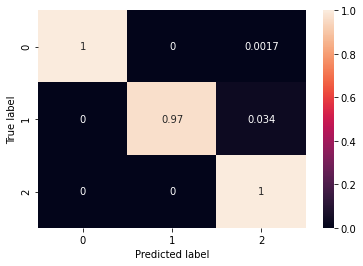

In [317]:
classReport(modelRN101,validationGen,validsteps)

# GRAYSCALE TEST

In [147]:
batch_size = 64

generator = ImageDataGenerator(rescale=1./255,rotation_range=15,width_shift_range=0.1,height_shift_range=0.1,
      horizontal_flip=True,zoom_range=0.1,fill_mode='nearest',validation_split = 0.15) 


trainGen= generator.flow_from_directory(trainPath,target_size=(106, 68),batch_size=batch_size,class_mode='categorical',color_mode='grayscale') 

validationGen = generator.flow_from_directory(trainPath,target_size=(106, 68),batch_size=batch_size,class_mode='categorical',shuffle=False, subset = 'validation',color_mode='grayscale')
color_mode='grayscale'

Found 11390 images belonging to 3 classes.
Found 1706 images belonging to 3 classes.


In [76]:
modelGray = modelGray()

In [77]:
optimizer= "adam"
history=fit(modelGray,trainGen,validationGen,optimizer,steps_per_epoch,7,validsteps)

Epoch 1/7
177/177 [==============================] - 56s 315ms/step - loss: 0.8576 - accuracy: 0.5737 - val_loss: 0.4158 - val_accuracy: 0.8510
Epoch 2/7
177/177 [==============================] - 54s 306ms/step - loss: 0.3237 - accuracy: 0.8749 - val_loss: 0.1421 - val_accuracy: 0.9495
Epoch 3/7
177/177 [==============================] - 54s 306ms/step - loss: 0.1633 - accuracy: 0.9390 - val_loss: 0.1386 - val_accuracy: 0.9447
Epoch 4/7
177/177 [==============================] - 57s 322ms/step - loss: 0.1056 - accuracy: 0.9634 - val_loss: 0.0638 - val_accuracy: 0.9838
Epoch 5/7
177/177 [==============================] - 55s 312ms/step - loss: 0.0798 - accuracy: 0.9730 - val_loss: 0.0347 - val_accuracy: 0.9898
Epoch 6/7
177/177 [==============================] - 55s 312ms/step - loss: 0.0663 - accuracy: 0.9766 - val_loss: 0.0339 - val_accuracy: 0.9874
Epoch 7/7
27/27 [==============================] - 4s 145ms/step - loss: 0.0440 - accuracy: 0.9853
Test loss: =  0.04396834969520569
Tes

In [78]:
modelGray.save("modelgray.h5")

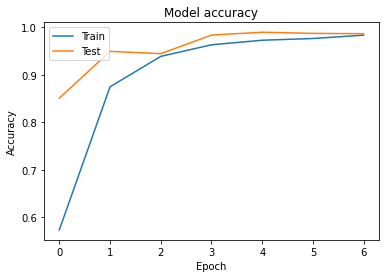

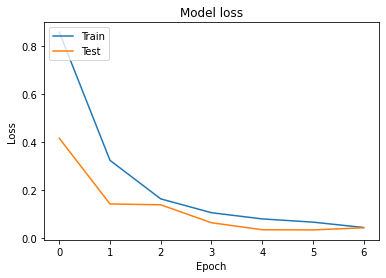

In [79]:
plot(history)

Classification Report
              precision    recall  f1-score   support

       paper       1.00      0.99      0.99       594
        rock       0.97      0.99      0.98       552
    scissors       0.98      0.97      0.97       560

    accuracy                           0.98      1706
   macro avg       0.98      0.98      0.98      1706
weighted avg       0.98      0.98      0.98      1706

Confusion Matrix
[[0.98653199 0.         0.01346801]
 [0.00181159 0.99275362 0.00543478]
 [0.         0.03035714 0.96964286]]


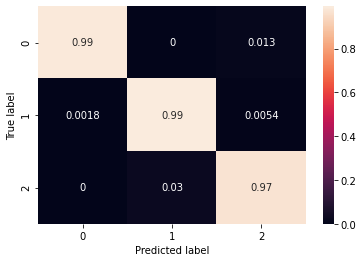

In [80]:
classReport(modelGray,validationGen,validsteps)

# RandomForestClassifier

In [194]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [229]:
from tensorflow.keras.preprocessing import image
 
paper = glob.glob(trainPath+'paper/*.*')
rock = glob.glob(trainPath+'rock/*.*')
scissors = glob.glob(trainPath+'scissors/*.*')
classN=[paper,rock,scissors]
data = []
labels = []

for i in range(len(classN)):
    for e in classN[i]:   
        image=tensorflow.keras.preprocessing.image.load_img(e,color_mode='grayscale',target_size= (106,68))
        image=np.array(image)
        data.append(image)
        labels.append(i)
data = np.array(data)
labels = np.array(labels)



In [263]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.15)

In [264]:
nsamples, nx, ny = X_train.shape
X_train = X_train.reshape((nsamples,nx*ny))

In [265]:
nsamples, nx, ny = X_test.shape
X_test = X_test.reshape((nsamples,nx*ny))

In [266]:
clf = RandomForestClassifier(max_depth=20, random_state=0).fit(X_train, y_train)
pred=clf.predict(X_test)
print(accuracy_score(y_test, pred))

0.9970743124634289


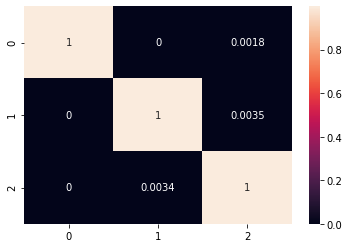

In [269]:
conf_mat = confusion_matrix(y_test,pred)
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_mat_normalized,annot=True)

In [270]:
print('Classification Report')
print(classification_report(y_test,pred, target_names=["paper","rock","scissors"]))

Classification Report
              precision    recall  f1-score   support

       paper       1.00      1.00      1.00       554
        rock       1.00      1.00      1.00       568
    scissors       0.99      1.00      1.00       587

    accuracy                           1.00      1709
   macro avg       1.00      1.00      1.00      1709
weighted avg       1.00      1.00      1.00      1709



 
 
 **Testing:**

In [4]:
img = cv2.resize(cv2.imread("INPUT/Tests/paper1.jpg"),(640,480))
img = img[28:452, 183:457]
img = cv2.resize(img,(106,68))
img = cv2.cvtColor(cv2.resize(img,(68,106)),cv2.COLOR_BGR2GRAY)
cv2.imwrite("INPUT/Tests/paper.jpg", img)              

True

In [5]:
img1 = cv2.resize(cv2.imread("INPUT/Tests/rock1.jpg"),(640,480))
img1 = img1[28:452, 183:457] 
img1 = cv2.cvtColor(cv2.resize(img1,(68,106)),cv2.COLOR_BGR2GRAY)
cv2.imwrite("INPUT/Tests/rock.jpg", img1)

True

In [16]:
img2=cv2.resize(cv2.imread("INPUT/Tests/scissors.jpg"),(640,480))
img2 = img2[28:452, 183:457]
img2 = cv2.cvtColor(cv2.resize(img2,(68,106)),cv2.COLOR_BGR2GRAY)
cv2.imwrite("INPUT/Tests/scissors.jpg", img2)

True

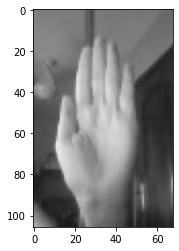

In [17]:
img=cv2.imread("INPUT/Tests/paper.jpg")
plt.imshow(img)

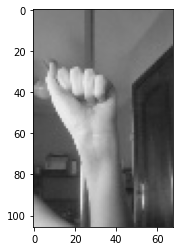

In [18]:
img1=cv2.imread("INPUT/Tests/rock.jpg")
plt.imshow(img1)

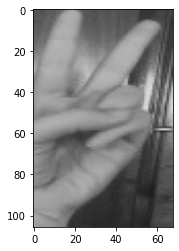

In [19]:
img2=cv2.imread("INPUT/Tests/scissors.jpg")
plt.imshow(img2)

In [20]:
model=load_model("model.h5")

In [21]:
pred = model.predict(np.array([img]))
print("Predicted P:",pred)
pred1 = model.predict(np.array([img1]))
print("Predicted R:",pred1)
pred2 = model.predict(np.array([img2]))
print("Predicted S:",pred2)
print("\n\n")


Predicted P: [[1. 0. 0.]]
Predicted R: [[0. 1. 0.]]
Predicted S: [[0. 0. 1.]]



